## Stock Price Forecasting

In [3]:
import warnings #import warnings module to suppress warnings
import itertools #import itertools module to generate parameter grid for SARIMA model
import numpy as np #import numpy module for numerical computations
import matplotlib.pyplot as plt #import matplotlib module for plotting
warnings.filterwarnings("ignore") #ignore future warnings
plt.style.use('fivethirtyeight') #set plot style to 'fivethirtyeight'
import pandas as pd #import pandas module for data manipulation
import statsmodels.api as sm #import statsmodels module for time series analysis
import matplotlib #import matplotlib module for setting plot parameters
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for stock market.

In [4]:
#load data from 'prices.txt' file and set Date column as index
df = pd.read_csv('prices.txt')
stock=df

In [5]:
#print first 5 rows of DataFrame
stock.head()

,Date,Price
0,2/21/2017,55.478001
1,2/22/2017,54.702000
2,2/23/2017,51.198002
3,2/24/2017,51.400002
4,2/27/2017,49.245998


In [6]:
#print minimum date in Date column
stock['Date'].min()

'01-02-18'

In [7]:
#print maximum date in Date col
stock['Date'].max()

'9/30/2021'

In [8]:
#convert Date column to datetime format
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [9]:
#sort DataFrame by Date column
stock = stock.sort_values('Date')

In [10]:
#check for missing values in DataFrame
stock.isnull().sum()

Date     0
Price    0
dtype: int64

In [11]:
#group DataFrame by Date column and compute sum of Price column
stock = stock.groupby('Date')['Price'].sum().reset_index()

In [12]:
stock.head()

,Date,Price
0,01-02-18,64.106003
1,01-02-19,62.023998
2,01-02-20,86.052002
3,01-03-18,63.450001
4,01-03-19,60.071999


## Indexing with time series data

In [13]:
#set Date column as index
stock = stock.set_index('Date')
stock.index

Index(['01-02-18', '01-02-19', '01-02-20', '01-03-18', '01-03-19', '01-03-20',
       '01-03-22', '01-04-18', '01-04-19', '01-04-21',
       ...
       '9/28/2017', '9/28/2018', '9/28/2020', '9/28/2021', '9/29/2017',
       '9/29/2020', '9/29/2021', '9/30/2019', '9/30/2020', '9/30/2021'],
      dtype='object', name='Date', length=1259)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [14]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Price.resample('M').mean()


Have a quick peek 2017 sales data.

In [15]:
monthly_mean['2018':]

Date
2018-01-31      67.716666
2018-02-28      67.155474
2018-03-31      63.196666
2018-04-30      57.954572
2018-05-31      57.970455
2018-06-30      67.120095
2018-07-31      62.394952
2018-08-31      66.242869
2018-09-30      58.029579
2018-10-31      56.998609
2018-11-30      68.899048
2018-12-31      68.821895
2019-01-31      63.698857
2019-02-28      61.545684
2019-03-31      55.551428
2019-04-30      53.331143
2019-05-31      43.943091
2019-06-30      42.743300
2019-07-31      48.476455
2019-08-31      45.020545
2019-09-30      47.452300
2019-10-31      53.270956
2019-11-30      67.660000
2019-12-31      75.538952
2020-01-31     105.731809
2020-02-29     159.489368
2020-03-31     111.820273
2020-04-30     132.719715
2020-05-31     159.885102
2020-06-30     192.708453
2020-07-31     292.028179
2020-08-31     360.059711
2020-09-30     413.495239
2020-10-31     427.209545
2020-11-30     465.612499
2020-12-31     638.818640
2021-01-31     828.776839
2021-02-28     794.269470
2021-03

## Visualizing Close time series data

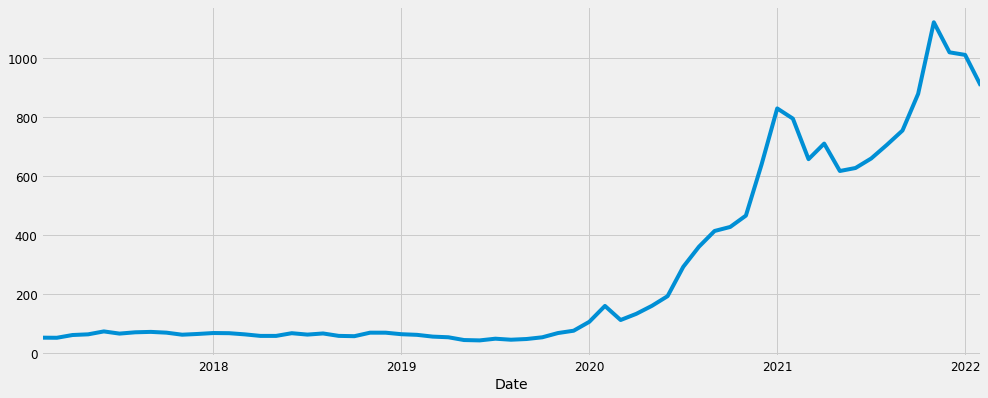

In [16]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

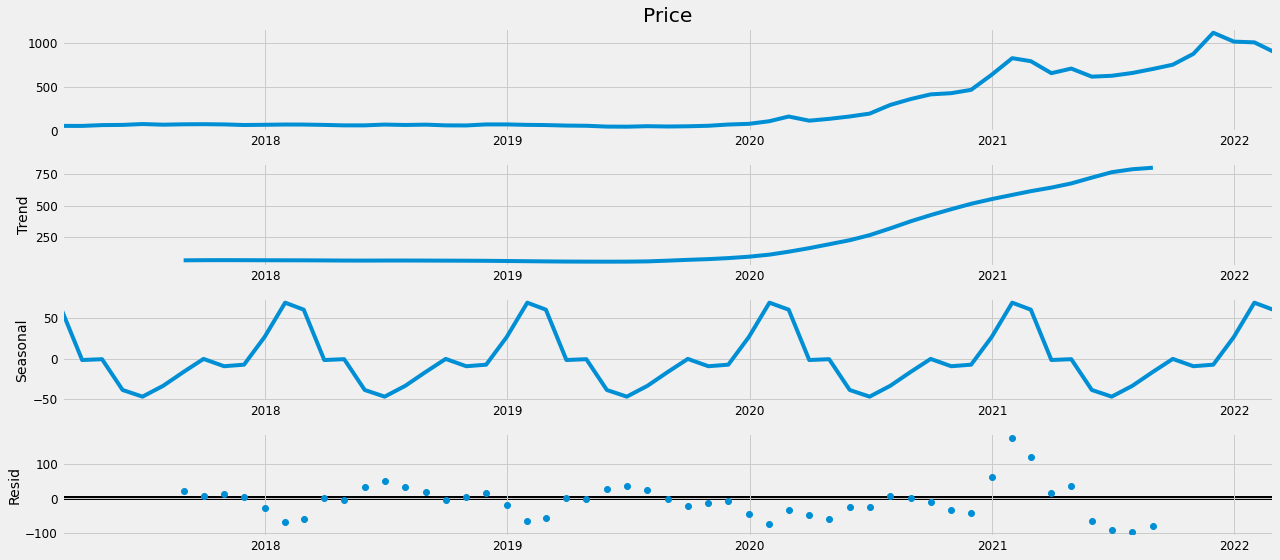

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the Close price is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation `ARIMA(p, d, q)`. These three parameters account for seasonality, trend, and noise in data:`

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35074D+00    |proj g|=  3.82165D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   5.354D-07   7.351D+00
  F =   7.3506736616061064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:898.7821867159449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.18896D+00    |proj g|=  1.45601D-03

At iterate   10    f=  4.18239D+00    |proj g|=  7.75827D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     23      1     0     0   1.796D-06   4.182D+00
  F =   4.1821582083543749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:516.2233014192338
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40860D+00    |proj g|=  4.68497D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:697.8900696831685
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:612.9717723210459
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:459.95185947459646
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:623.1050662425473

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63972D+00    |proj g|=  3.70922D-01

At iterate    5    f=  6.18916D+00    |proj g|=  4.46975D-03

At iterate   10    f=  6.18910D+00    |proj g|=  5.26237D-03

At iterate   15    f=  6.18404D+00    |proj g|=  7.35385D-02

At iterate   20    f=  6.03147D+00    |proj g|=  3.19999D-01

At iterate   25    f=  5.83599D+00    |proj g|=  5.79102D-02

At iterate   30    f=  5.74799D+00    |proj g|=  1.30208D-02

At iterate   35    f=  5.71353D+00    |proj g|=  3.73230D-02

At iterate   40    f=  5.69300D+00    |proj g|=  4.99

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.41768D+00    |proj g|=  1.88086D-03

At iterate   15    f=  5.40351D+00    |proj g|=  4.56955D-02

At iterate   20    f=  5.06882D+00    |proj g|=  5.48061D-01

At iterate   25    f=  4.84724D+00    |proj g|=  3.89771D-02

At iterate   30    f=  4.82757D+00    |proj g|=  1.58115D-02

At iterate   35    f=  4.82743D+00    |proj g|=  6.62843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     50      1     0     0   5.741D-06   4.827D+00
  F =   4.8274292922171016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:596.9463736504

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:486.2260309480522
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99179D+00    |proj g|=  4.37816D-01

At iterate    5    f=  3.92263D+00    |proj g|=  1.85466D-01

At iterate   10    f=  3.87205D+00    |proj g|=  1.65865D-02

At iterate   15    f=  3.87011D+00    |proj g|=  1.36809D-03

At iterate   20    f=  3.86681D+00    |proj g|=  8.13673D-02

At iterate   25    f=  3.85092D+00    |proj g|=  5.95436D-02

At iterate   30    f=  3.72124D+00    |proj g|=  4.88000D-02

At iterate   35    f=  3.72093D+00    |proj g|=  8.83294D-03

At iterate   40    f=  3.72088D+00    |proj g|=  5.74483D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     71      3     1     0   4.615D+04   1.144D+01
  F =   11.442317983687730     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1399.962794009903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44103D+00    |proj g|=  1.68070D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-6.681E+01  -gs= 5.689E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     49      4     3     0   6.406D+03   1.324D+01
  F =   13.240540902680596     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1621.3459901270328
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25312D+00    |proj g|=  2.11427D-02

At iterate    5    f=  5.25290D+00    |proj g|=  2.81933D-03

At iterate   10    f=  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.32865D+00    |proj g|=  4.34087D-03

At iterate   10    f=  4.32807D+00    |proj g|=  3.30849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     16      1     0     0   1.490D-06   4.328D+00
  F =   4.3280624648317625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:532.023620709475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06110D+01    |proj g|=  7.19968D-03
  ys=-2.172E+01 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  2.05129D+01    |proj g|=  7.19968D-03
  ys=-2.172E+01  -gs= 5.438E-01 BFGS update SKIPPED

At iterate    5    f=  1.12854D+01    |proj g|=  3.42047D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     47      1     1     0   1.776D-10   1.129D+01
  F =   11.285339112717789     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1384.8113717515703


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42890D+00    |proj g|=  2.26424D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   2.262D-04   5.429D+00
  F =   5.4289010246105516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:666.3259250024873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variable

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99155D+00    |proj g|=  8.86147D-01

At iterate    5    f=  4.45312D+00    |proj g|=  8.31517D-02

At iterate   10    f=  4.44047D+00    |proj g|=  4.32912D-03

At iterate   15    f=  4.44031D+00    |proj g|=  1.15884D-01

At iterate   20    f=  4.43243D+00    |proj g|=  3.72706D-01

At iterate   25    f=  4.43026D+00    |proj g|=  6.26828D-04

At iterate   30    f=  4.43026D+00    |proj g|=  4.89163D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.42275D+00    |proj g|=  7.84855D-04

At iterate   20    f=  3.42236D+00    |proj g|=  2.74791D-02

At iterate   25    f=  3.42194D+00    |proj g|=  1.01674D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     42      1     0     0   1.748D-07   3.422D+00
  F =   3.4219368436011242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:425.47629491933714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.36028D+00    |proj g|=  4.92806D-02

At iterate   30    f=  4.33947D+00    |proj g|=  3.07770D-02

At iterate   35    f=  4.33440D+00    |proj g|=  6.18502D-02

At iterate   40    f=  4.33249D+00    |proj g|=  2.82102D-02

At iterate   45    f=  4.33184D+00    |proj g|=  7.30915D-03

At iterate   50    f=  4.33145D+00    |proj g|=  3.73271D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     65      1     0     0   3.733D-03   4.331D+00
  F =   4.3314458397091506     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:536.4363924445

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.32372D+00    |proj g|=  1.69152D-02

At iterate   10    f=  3.32325D+00    |proj g|=  1.04692D-03

At iterate   15    f=  3.32320D+00    |proj g|=  1.20254D-02

At iterate   20    f=  3.32300D+00    |proj g|=  1.46183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   9.903D-09   3.323D+00
  F =   3.3229955991264704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:413.4054630934294
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19077D+00    |proj g|=  6.86571D-01

At iterate    5    f=  4.51574D+00    |proj g|=  6.47283D-02

At iterate   10    f=  4.50016D+00    |proj g|=  3.72965D-02

At iterate   15    f=  4.42469D+00    |proj g|=  6.66981D-02

At iterate   20    f=  4.42215D+00    |proj g|=  1.90353D-03

At iterate   25    f=  4.42188D+00    |proj g|=  2.77072D-02

At iterate   30    f=  4.39569D+00    |proj g|=  4.10884D-01

At iterate   35    f=  4.34764D+00    |proj g|=  3.76146D-02

At iterate   40    f=  4.33668D+00    |proj g|=  2.85396D-02

At iterate   45    f=  4.33119D+00    |proj g|=  1.77162D-02


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  4.33073D+00    |proj g|=  3.92147D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   3.921D-03   4.331D+00
  F =   4.3307287857294092     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:538.3489118589879
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63483D+00    |proj g|=  3.20895D-01

At iterate    5    f=  3.43104D+00    |proj g|=  2.89784D-01

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.34346D+00    |proj g|=  9.16158D-03

At iterate   10    f=  4.33387D+00    |proj g|=  8.09998D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   6.006D-05   4.334D+00
  F =   4.3337380889657631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:534.7160468538231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43145D+00    |proj g|=  4.04690D-06

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.31874D+00    |proj g|=  2.27340D-03

At iterate   10    f=  3.31819D+00    |proj g|=  4.88904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   3.464D-06   3.318D+00
  F =   3.3181927655298935     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:410.819517394647
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11066D+01    |proj g|=  7.53612D-03
  ys=-1.244E+02 

 This problem is unconstrained.



At iterate    5    f=  1.16273D+01    |proj g|=  2.03351D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     48      2     2     0   1.158D-14   1.162D+01
  F =   11.617260851327135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1425.3058238619105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25033D+00    |proj g|=  5.26610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  4.28802D+00    |proj g|=  8.73467D-03

At iterate   15    f=  4.28362D+00    |proj g|=  9.73674D-02

At iterate   20    f=  4.28011D+00    |proj g|=  5.70623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   1.163D-06   4.280D+00
  F =   4.2801078316089010     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:528.1731554562859
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  8.30427D+00    |proj g|=  3.46661D+05
  ys=-1.577E+00  -gs= 3.160E-01 BFGS update SKIPPED
  ys=-2.985E-03  -gs= 7.492E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    141      3     4     0   4.848D+05   6.922D+00
  F =   6.9216598843278074     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:852.4425058879925
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33955D+00    |proj g|=  1.90295D-02

At iterate    5    f=  4.33849D+00    |proj g|=  7.50153D-03

At iterate   10    f=  4.33693D+00    |proj g|=  1.88519D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.961E+01  -gs= 5.473E-01 BFGS update SKIPPED
  ys=-2.163E+01  -gs= 5.437E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  8.51297D+00    |proj g|=  3.16064D+05
  ys=-1.419E+00  -gs= 3.161E-01 BFGS update SKIPPED
  ys=-1.737E-03  -gs= 1.702E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7    135      3     4     0   3.483D+05   8.188D+00
  F =   8.1875278453645599     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1008.8783971344762



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [20]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [21]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31899D+00    |proj g|=  9.46342D-03

At iterate    5    f=  3.31874D+00    |proj g|=  2.27340D-03

At iterate   10    f=  3.31819D+00    |proj g|=  4.88904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   3.464D-06   3.318D+00
  F =   3.3181927655298935     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025    

 This problem is unconstrained.


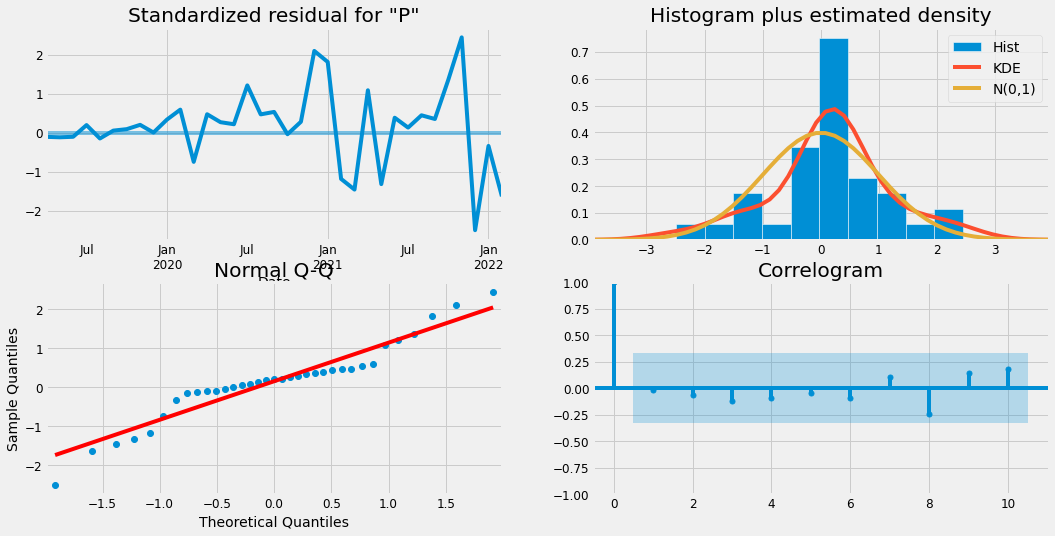

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

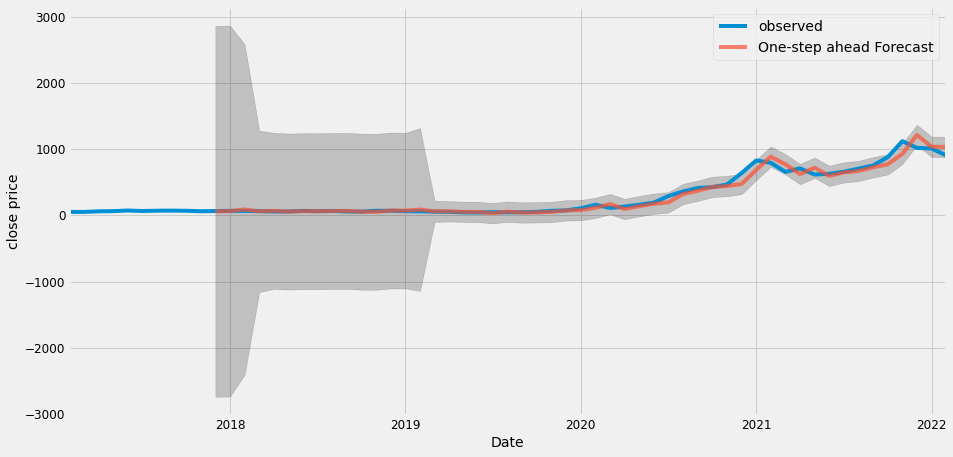

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4271.69


In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 65.36


## Producing and visualizing forecasts

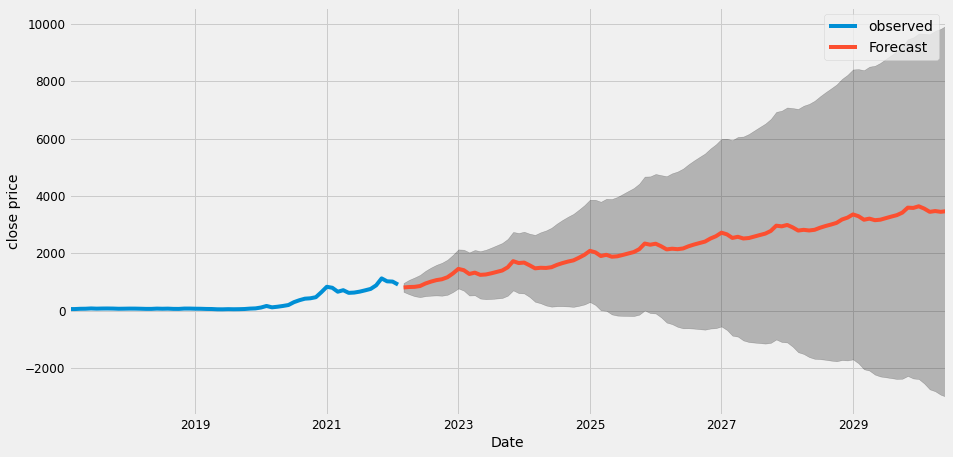

In [26]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()